In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree

In [3]:
train_data= pd.read_csv('/kaggle/input/santander-customer-satisfaction/train.csv')
test_data= pd.read_csv('/kaggle/input/santander-customer-satisfaction/test.csv')

In [4]:
train_data.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [5]:
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


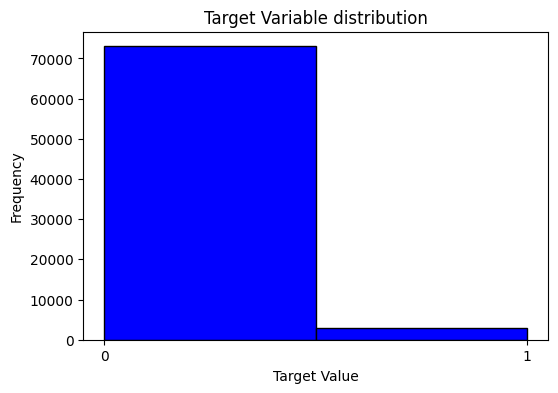

In [6]:
#plotting the target data
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(train_data['TARGET'], bins=2, color='blue', edgecolor='black')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Target Variable distribution')
plt.xticks([0, 1])  # Set x-ticks to 0 and 1 only
plt.show()

In [7]:
# Separating the target column from training data
Xtrain = train_data.drop(columns=['TARGET'])  
Ytrain = train_data[['TARGET']] # Select 'TARGET' as target
Xtest = test_data.copy()
print(Xtest.shape)

# Print shapes to confirm
print(Xtrain.shape)  
print(Ytrain.shape) 

# Display the first few rows of Ytrain for verification
print(Xtrain['ID'])

(75818, 370)
(76020, 370)
(76020, 1)
0             1
1             3
2             4
3             8
4            10
          ...  
76015    151829
76016    151830
76017    151835
76018    151836
76019    151838
Name: ID, Length: 76020, dtype: int64


In [8]:
#selecting features based on correlations

features_correlation = train_data.corr()

#high correlation on target value
correl = features_correlation["TARGET"].sort_values(ascending=False)
selected_features = correl.index[1:4] #selecting top 3 features
print("Selected 3 featured with highest correlation to target\n", selected_features.tolist())

Selected 3 featured with highest correlation to target
 ['var36', 'var15', 'ind_var8_0']


In [9]:
#low correlation on target value
lowcorr = features_correlation["TARGET"].sort_values(ascending=True)
lowcorr_features = lowcorr.index[1:4] #selecting top 3 features
print("Selected 3 featured with lowest correlation to target\n", lowcorr_features.tolist())

Selected 3 featured with lowest correlation to target
 ['num_meses_var5_ult3', 'num_var30', 'num_var42']


In [10]:
# Filtering the features using the top features
Xtrain_final = Xtrain[selected_features]  # Training features with top features
Xtest_final = Xtest[selected_features]    # Test features with top features

# Training the model using the filtered training set
decisiont_final = DecisionTreeClassifier(criterion="entropy", max_depth=10, max_leaf_nodes=100)
decisiont_final.fit(Xtrain_final, Ytrain)

# Using Xtest_final to make predictions
Y_prednew = decisiont_final.predict(Xtest_final)

# Training the model using the filtered training set
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain_final, Ytrain, test_size=0.30, random_state=1)

In [12]:
from sklearn.metrics import accuracy_score, classification_report
# Predicting the response on the test dataset
Y_prednew = decisiont_final.predict(X_test)
Y_prednew = pd.DataFrame(Y_prednew, columns=['TARGET'])
Y_prednew['ID'] = Xtest['ID']  
Y_prednew = Y_prednew[['ID', 'TARGET']]  

# Print the predictions DataFrame
print(Y_prednew)
 # Calculating and printing the model accuracy
accuracy = accuracy_score(Y_test, decisiont_final.predict(X_test))  # Use the model's predictions
print("Accuracy:", accuracy)

          ID  TARGET
0          2       0
1          5       0
2          6       0
3          7       0
4          9       0
...      ...     ...
22801  45585       0
22802  45588       0
22803  45590       0
22804  45594       0
22805  45595       0

[22806 rows x 2 columns]
Accuracy: 0.9611505744102429


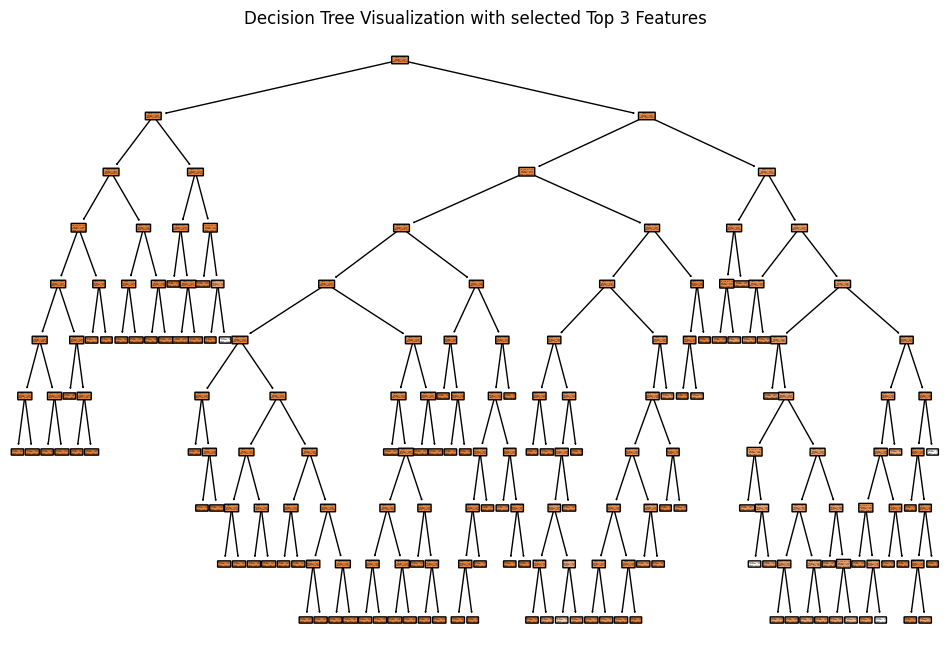

In [13]:
#plotting the final decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(decisiont_final, filled=True, feature_names=selected_features, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Decision Tree Visualization with selected Top 3 Features')
plt.show()

In [15]:
Y_testprobab = decisiont_final.predict_proba(Xtest_final)[:, 1]  # Probability for TARGET = 1

# Preparing the output DataFrame with 'ID' and 'TARGET' with the predicted probability for target=1
submission_csv = pd.DataFrame({
    'ID': Xtest['ID'].values,  
    'TARGET': Y_testprobab      
})

# Saving the DataFrame to a CSV file
submission_csv.to_csv('submission_csv.csv', index=False)

print(submission_csv.shape)

(75818, 2)
